In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("laptops.csv")

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df =df[['ram','storage','screen','final_price']]

array([[<AxesSubplot:title={'center':'final_price'}>]], dtype=object)

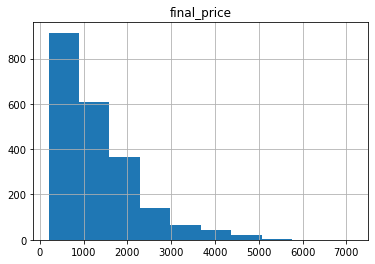

In [6]:
df[['final_price']].hist()

In [7]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [8]:
df['ram'].median()

16.0

In [9]:
n=len(df)
n_val =int(n*0.2)
n_test= int(n*0.2)
n_train =n- n_val -n_test

In [10]:
n

2160

In [11]:
n_val, n_test, n_train

(432, 432, 1296)

In [12]:
base =['ram','storage','screen']

In [13]:
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [14]:
df_train=df.iloc[idx[:n_train]]
df_val =df.iloc[n_train:n_train +n_val]
df_test =df.iloc[n_train+n_val:]

In [15]:
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

In [16]:
def train_linear_regression(X,y):
    ones =np.ones(X_train.shape[0])
    X= np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv =np.linalg.inv(XTX)
    w_full =XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [17]:
def rmse(y, y_pred):
    error = (y)-(y_pred)
    se= error ** 2
    mse =se.mean()
    rmse_value = np.sqrt(mse)
    score =round(rmse_value, 2)
    return score

In [18]:
X_train =df_train[base].fillna(0).values

In [19]:
w0,w =train_linear_regression(X_train,y_train)

In [20]:
X_val =df_val[base].fillna(0).values

In [21]:
y_pred =w0 + X_val.dot(w)
rmse(y_val,y_pred)

697.81

In [22]:
screen_mean =df_train['screen'].mean()
X_train =df_train[base].fillna(screen_mean).values

In [23]:
w0,w =train_linear_regression(X_train,y_train)

In [24]:
X_val =df_val[base].fillna(screen_mean).values

In [25]:
y_pred =w0 + X_val.dot(w)
rmse(y_val,y_pred)

699.46

In [26]:
def train_linear_regression_reg(X,y, r= 0.01):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX= XTX + r * np.eye(XTX.shape[0])
    XTX_inv =np.linalg.inv(XTX)
    w_full =XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [27]:
X_train =df_train[base].fillna(0).values
X_val =df_val[base].fillna(0).values

In [28]:
for r in [0, 0.01 ,0.1 ,1 ,5, 10, 100]:
    w0, w= train_linear_regression_reg(X_train,y_train,r=r)
    y_pred =w0 + X_val.dot(w)
    score =rmse(y_val, y_pred)
    print(score)

697.81
697.81
697.86
698.31
700.02
701.54
706.58


In [29]:
scores =[]

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx=np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train=df.iloc[idx[:n_train]]
    df_val =df.iloc[n_train:n_train +n_val]
    df_test =df.iloc[n_train+n_val:]
    
    X_train =df_train[base].fillna(0).values
    X_val =df_val[base].fillna(0).values
    y_train =df_train['final_price'].values
    y_val =df_val['final_price'].values
      
    w0,w =train_linear_regression(X_train,y_train)
    y_pred =w0 + X_val.dot(w)
    score =rmse(y_val, y_pred)
    scores.append(score)

In [30]:
std= np.std(scores)
print(round(std,3))

2.536


In [31]:
idx=np.arange(n)
np.random.seed(12)
np.random.shuffle(idx)

df_train=df.iloc[idx[:n_train]]
df_val =df.iloc[n_train:n_train +n_val]
df_test =df.iloc[n_train+n_val:]

df_train_full =pd.concat([df_train, df_val])
X_train_full = df_train_full[base].fillna(0)
y_train_full =df_train_full['final_price'].values
X_test =df_test[base].fillna(0)
y_test= df_test['final_price'].values
    
w0,w =train_linear_regression_reg(X_train_full,y_train_full,r=0.001)
y_pred =w0 + X_test.dot(w)
score =rmse(y_test, y_pred)
print(score)

615.99
